In [1]:
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta, timezone, tzinfo
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [39]:
stock_data = pd.read_csv('./toei_stock.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1240 non-null   object 
 1   Open       1240 non-null   float64
 2   High       1240 non-null   float64
 3   Low        1240 non-null   float64
 4   Close      1240 non-null   float64
 5   Adj Close  1240 non-null   float64
 6   Volume     1240 non-null   int64  
 7   timestamp  1240 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 77.6+ KB


<AxesSubplot:xlabel='timestamp'>

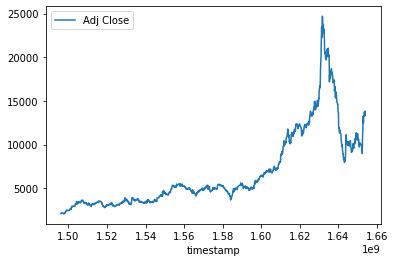

In [40]:
def formatJST(day):
    dt = parser.parse(day + " 15:00 JST", tzinfos={"JST":9*3600})
    return int(datetime.timestamp(dt))


stock_data['timestamp'] =  list(map(formatJST, list(stock_data['Date'])))
stock_data.sort_values(by=['timestamp'])
stock_data.info()
stock_data.plot(x="timestamp", y="Adj Close")

In [41]:
stock_data["shifted_adj_close"] = stock_data["Adj Close"].shift(1)
stock_data["shifted_adj_close"][0] = stock_data["Adj Close"][0]

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_10094/2461807197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["shifted_adj_close"][0] = stock_data["Adj Close"][0]


In [42]:
stock_data["Log Returns"] = np.log(stock_data["shifted_adj_close"] / stock_data["Adj Close"])

In [43]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,shifted_adj_close,Log Returns
0,2017-05-30,2253.333252,2276.666748,2253.333252,2276.666748,2094.753662,2700,1496124000,2094.753662,0.000000
1,2017-05-31,2253.333252,2296.666748,2253.333252,2296.666748,2113.155518,7500,1496210400,2094.753662,-0.008746
2,2017-06-01,2296.666748,2320.000000,2276.666748,2316.666748,2131.557617,9300,1496296800,2113.155518,-0.008671
3,2017-06-02,2326.666748,2326.666748,2283.333252,2286.666748,2103.954834,15000,1496383200,2131.557617,0.013034
4,2017-06-05,2290.000000,2320.000000,2286.666748,2320.000000,2134.624756,17400,1496642400,2103.954834,-0.014472


<AxesSubplot:xlabel='timestamp'>

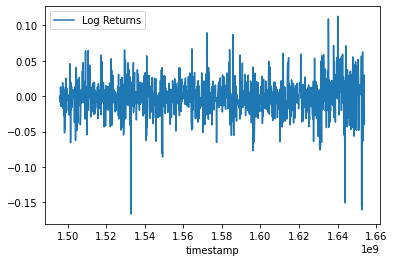

In [44]:
stock_data.plot(x="timestamp", y="Log Returns")

<AxesSubplot:xlabel='timestamp'>

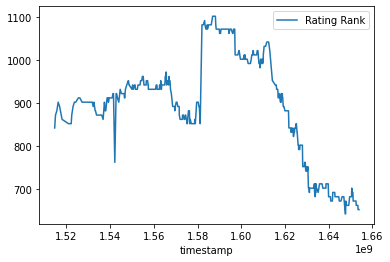

In [45]:
op_data = pd.read_csv('./one_piece_stats.csv')
def format(day):
    day = day[:day.rindex(" (")]
    dt = parser.parse(day)
    return int(datetime.timestamp(dt))

op_data['timestamp'] =  list(map(format, list(op_data['Date'])))

op_data["Members"] = op_data["Members"].str.replace(',', '').astype(int)
op_data["Scored by"] = op_data["Scored by"].str.replace(',', '').astype(int)
op_data.plot(x="timestamp", y="Rating Rank")

In [46]:
op_data.head()

,Score,Scored by,Popularity Rank,Rating Rank,Members,Date,timestamp
0,8.55,389305,32,842,653763,Sat Dec 30 2017 13:55:07 GMT-0500 (Eastern Sta...,1514624107
1,8.54,390598,32,872,656161,Thu Jan 04 2018 01:00:54 GMT-0500 (Eastern Sta...,1515009654
2,8.54,392776,32,882,660222,Thu Jan 11 2018 01:33:03 GMT-0500 (Eastern Sta...,1515616383
3,8.54,394764,32,902,663864,Thu Jan 18 2018 02:15:08 GMT-0500 (Eastern Sta...,1516223708
4,8.54,396607,32,892,667388,Thu Jan 25 2018 16:09:50 GMT-0500 (Eastern Sta...,1516878590


In [47]:
j=0
good_indices = []
stock_offset = 0
aligned_scores = []
ended = -1
for i in range(len(stock_data["timestamp"])):
    cur_time = stock_data["timestamp"][i]
    prev_time = cur_time-86400

    while cur_time>op_data["timestamp"][j]:
        j+=1
        if j==len(op_data["timestamp"]):
            ended = i                
            break
    
    if ended>0:
        print("broke at", i)
        break

    if j==0:
        stock_offset = i
        continue

    op_time = op_data["timestamp"][j-1]

    aligned_scores.append(op_data["Rating Rank"][j-1])
    good_indices.append(j-1)


print(len(aligned_scores))

sliced_data = stock_data[stock_offset+1:ended]
sliced_data["Rank"]=aligned_scores
sliced_data.head()


broke at 1239
1085


/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_10094/2239852325.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_data["Rank"]=aligned_scores


,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,shifted_adj_close,Log Returns,Rank
154,2018-01-01,3666.666748,3666.666748,3666.666748,3666.666748,3373.688232,0,1514786400,3373.688232,0.000000,842
155,2018-01-02,3666.666748,3666.666748,3666.666748,3666.666748,3373.688232,0,1514872800,3373.688232,0.000000,842
156,2018-01-03,3666.666748,3666.666748,3666.666748,3666.666748,3373.688232,0,1514959200,3373.688232,0.000000,842
157,2018-01-04,3666.666748,3730.000000,3646.666748,3646.666748,3355.286133,11400,1515045600,3373.688232,0.005470,872
158,2018-01-05,3650.000000,3676.666748,3626.666748,3676.666748,3382.888916,10800,1515132000,3355.286133,-0.008193,872


In [51]:
# del stock_data['timestamp']
del sliced_data['shifted_adj_close']
del sliced_data['Close']
del sliced_data['Low']
del sliced_data['High']
del sliced_data['Open']


,Date,Adj Close,Volume,timestamp,Log Returns,Rank
154,2018-01-01,3373.688232,0,1514786400,0.000000,842
155,2018-01-02,3373.688232,0,1514872800,0.000000,842
156,2018-01-03,3373.688232,0,1514959200,0.000000,842
157,2018-01-04,3355.286133,11400,1515045600,0.005470,872
158,2018-01-05,3382.888916,10800,1515132000,-0.008193,872


In [57]:
sliced_data["Adj Rank"]=np.log(sliced_data["Rank"])

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_10094/2070497468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliced_data["Adj Rank"]=np.log(sliced_data["Rank"])


<AxesSubplot:xlabel='Date'>

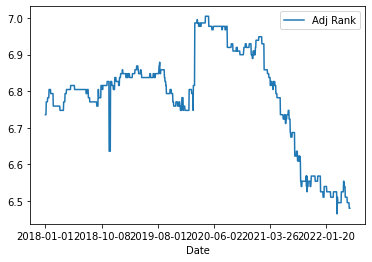

In [58]:
sliced_data.plot(x="Date", y="Adj Rank")

In [60]:
sliced_data.head()

,Date,Adj Close,Volume,timestamp,Log Returns,Rank,Adj Rank
154,2018-01-01,3373.688232,0,1514786400,0.000000,842,6.735780
155,2018-01-02,3373.688232,0,1514872800,0.000000,842,6.735780
156,2018-01-03,3373.688232,0,1514959200,0.000000,842,6.735780
157,2018-01-04,3355.286133,11400,1515045600,0.005470,872,6.770789
158,2018-01-05,3382.888916,10800,1515132000,-0.008193,872,6.770789


In [62]:
sliced_data.to_csv("processed_data.csv", index=False)